## **Importing Libraries And Loading Data**:

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('dataset_diabetes/diabetic_data.csv')
mapping = pd.read_csv('dataset_diabetes/IDs_mapping.csv')

In [2]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


Columns that has only one value can be dropped because they won't affect the output whatsover.

---

## Data Exploration:

In [3]:
df['payer_code'].unique()

array(['?', 'MC', 'MD', 'HM', 'UN', 'BC', 'SP', 'CP', 'SI', 'DM', 'CM',
       'CH', 'PO', 'WC', 'OT', 'OG', 'MP', 'FR'], dtype=object)

In [4]:
df['medical_specialty'].unique()

array(['Pediatrics-Endocrinology', '?', 'InternalMedicine',
       'Family/GeneralPractice', 'Cardiology', 'Surgery-General',
       'Orthopedics', 'Gastroenterology',
       'Surgery-Cardiovascular/Thoracic', 'Nephrology',
       'Orthopedics-Reconstructive', 'Psychiatry', 'Emergency/Trauma',
       'Pulmonology', 'Surgery-Neuro',
       'Obsterics&Gynecology-GynecologicOnco', 'ObstetricsandGynecology',
       'Pediatrics', 'Hematology/Oncology', 'Otolaryngology',
       'Surgery-Colon&Rectal', 'Pediatrics-CriticalCare', 'Endocrinology',
       'Urology', 'Psychiatry-Child/Adolescent', 'Pediatrics-Pulmonology',
       'Neurology', 'Anesthesiology-Pediatric', 'Radiology',
       'Pediatrics-Hematology-Oncology', 'Psychology', 'Podiatry',
       'Gynecology', 'Oncology', 'Pediatrics-Neurology',
       'Surgery-Plastic', 'Surgery-Thoracic',
       'Surgery-PlasticwithinHeadandNeck', 'Ophthalmology',
       'Surgery-Pediatric', 'Pediatrics-EmergencyMedicine',
       'PhysicalMedicineandRe

In [5]:
df['num_lab_procedures'].unique()

array([ 41,  59,  11,  44,  51,  31,  70,  73,  68,  33,  47,  62,  60,
        55,  49,  75,  45,  29,  35,  42,  66,  36,  19,  64,  25,  53,
        52,  87,  27,  37,  46,  28,  48,  72,  10,   2,  65,  67,  40,
        54,  58,  57,  43,  32,  83,  34,  39,  69,  38,  56,  22,  96,
        78,  61,  88,  50,   1,  18,  82,   9,  63,  24,  71,  77,  81,
        76,  90,  93,   3, 103,  13,  80,  85,  16,  15,  12,  30,  23,
        17,  21,  79,  26,   5,  95,  97,  84,  14,  74, 105,  86,  98,
        20,   6,  94,   8, 102, 100,   7,  89,  91,  92,   4, 101,  99,
       114, 113, 111, 129, 107, 108, 106, 104, 109, 120, 132, 121, 126,
       118])

In [6]:
df['diag_1'].unique()

array(['250.83', '276', '648', '8', '197', '414', '428', '398', '434',
       '250.7', '157', '518', '999', '410', '682', '402', '737', '572',
       'V57', '189', '786', '427', '996', '277', '584', '462', '473',
       '411', '174', '486', '998', '511', '432', '626', '295', '196',
       '250.6', '618', '182', '845', '423', '808', '250.4', '722', '403',
       '250.11', '784', '707', '440', '151', '715', '997', '198', '564',
       '812', '38', '590', '556', '578', '250.32', '433', 'V58', '569',
       '185', '536', '255', '250.13', '599', '558', '574', '491', '560',
       '244', '250.03', '577', '730', '188', '824', '250.8', '332', '562',
       '291', '296', '510', '401', '263', '438', '70', '250.02', '493',
       '642', '625', '571', '738', '593', '250.42', '807', '456', '446',
       '575', '250.41', '820', '515', '780', '250.22', '995', '235',
       '250.82', '721', '787', '162', '724', '282', '514', 'V55', '281',
       '250.33', '530', '466', '435', '250.12', 'V53', '789', '

In [7]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

---

## Pre-Procecssing:

Dropping unique identifiers

In [9]:
df.drop(['encounter_id', 'patient_nbr'], axis=1, inplace=True)

In [10]:
df.nunique().sort_values()

examide                       1
citoglipton                   1
acetohexamide                 2
tolbutamide                   2
diabetesMed                   2
troglitazone                  2
metformin-rosiglitazone       2
metformin-pioglitazone        2
glipizide-metformin           2
glimepiride-pioglitazone      2
change                        2
gender                        3
max_glu_serum                 3
readmitted                    3
tolazamide                    3
A1Cresult                     3
glyburide-metformin           4
acarbose                      4
rosiglitazone                 4
insulin                       4
miglitol                      4
repaglinide                   4
chlorpropamide                4
nateglinide                   4
metformin                     4
glyburide                     4
glipizide                     4
glimepiride                   4
pioglitazone                  4
race                          6
num_procedures                7
admissio

Columns that has only one value can be dropped because they won't affect the output whatsover.

In [11]:
for col in df.columns:
    if df[col].nunique() == 1:
        print(f"{col} has only one unique value and can be dropped.")

examide has only one unique value and can be dropped.
citoglipton has only one unique value and can be dropped.


In [12]:
df.drop(['examide', 'citoglipton'], axis=1, inplace=True)

Dropping columns with high percentage of null values.

In [13]:
null_percent = df.isnull().mean() * 100
null_percent[null_percent > 0].sort_values(ascending=False)

max_glu_serum    94.746772
A1Cresult        83.277322
dtype: float64

In [14]:
df.drop(['max_glu_serum', 'A1Cresult'], axis=1, inplace=True)

In [15]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

race: ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
gender: ['Female' 'Male' 'Unknown/Invalid']
age: ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
weight: ['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
admission_type_id: [6 1 2 3 4 5 8 7]
discharge_disposition_id: [25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]
admission_source_id: [ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]
time_in_hospital: [ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
payer_code: ['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']
medical_specialty: ['Pediatrics-Endocrinology' '?' 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthopedics'
 'Gastroenterology' 'Surgery-Cardiovascular/Thoracic' 'Nephrology'
 'Orthopedics-Reconstructive' 'Psychiatry' 'Emergency/Trauma'
 'Pulmonology' 

Dropping columns with high percentage of `?` value as it's similar to null

In [16]:
df.isin(['?']).mean().sort_values(ascending=False) * 100

weight                      96.858479
medical_specialty           49.082208
payer_code                  39.557416
race                         2.233555
diag_3                       1.398306
diag_2                       0.351787
diag_1                       0.020636
age                          0.000000
time_in_hospital             0.000000
gender                       0.000000
admission_type_id            0.000000
discharge_disposition_id     0.000000
num_procedures               0.000000
num_lab_procedures           0.000000
admission_source_id          0.000000
num_medications              0.000000
number_inpatient             0.000000
number_emergency             0.000000
number_outpatient            0.000000
number_diagnoses             0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide                  0.000000
chlorpropamide               0.000000
glimepiride                  0.000000
acetohexamide                0.000000
glipizide   

In [17]:
df.drop(['weight', 'medical_specialty', 'payer_code'], axis=1, inplace=True)
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


In [18]:
df.isin(['?']).mean().sort_values(ascending=False) * 100

race                        2.233555
diag_3                      1.398306
diag_2                      0.351787
diag_1                      0.020636
gender                      0.000000
admission_source_id         0.000000
age                         0.000000
admission_type_id           0.000000
discharge_disposition_id    0.000000
num_procedures              0.000000
num_lab_procedures          0.000000
time_in_hospital            0.000000
num_medications             0.000000
number_inpatient            0.000000
number_emergency            0.000000
number_outpatient           0.000000
number_diagnoses            0.000000
metformin                   0.000000
repaglinide                 0.000000
nateglinide                 0.000000
chlorpropamide              0.000000
glimepiride                 0.000000
acetohexamide               0.000000
glipizide                   0.000000
glyburide                   0.000000
tolbutamide                 0.000000
pioglitazone                0.000000
r

Replacing the remaining `?` values with the mode

In [19]:
for col in df.columns:
    if df[col].isin(['?']).any():
        mode_val = df[col].mode().iloc[0]
        df[col] = df[col].replace('?', mode_val)

In [20]:
df.isin(['?']).mean().sort_values(ascending=False) * 100

race                        0.0
gender                      0.0
age                         0.0
admission_type_id           0.0
discharge_disposition_id    0.0
admission_source_id         0.0
time_in_hospital            0.0
num_lab_procedures          0.0
num_procedures              0.0
num_medications             0.0
number_outpatient           0.0
number_emergency            0.0
number_inpatient            0.0
diag_1                      0.0
diag_2                      0.0
diag_3                      0.0
number_diagnoses            0.0
metformin                   0.0
repaglinide                 0.0
nateglinide                 0.0
chlorpropamide              0.0
glimepiride                 0.0
acetohexamide               0.0
glipizide                   0.0
glyburide                   0.0
tolbutamide                 0.0
pioglitazone                0.0
rosiglitazone               0.0
acarbose                    0.0
miglitol                    0.0
troglitazone                0.0
tolazami

In [21]:
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")

race: 5 unique values
gender: 3 unique values
age: 10 unique values
diag_1: 716 unique values
diag_2: 748 unique values
diag_3: 789 unique values
metformin: 4 unique values
repaglinide: 4 unique values
nateglinide: 4 unique values
chlorpropamide: 4 unique values
glimepiride: 4 unique values
acetohexamide: 2 unique values
glipizide: 4 unique values
glyburide: 4 unique values
tolbutamide: 2 unique values
pioglitazone: 4 unique values
rosiglitazone: 4 unique values
acarbose: 4 unique values
miglitol: 4 unique values
troglitazone: 2 unique values
tolazamide: 3 unique values
insulin: 4 unique values
glyburide-metformin: 4 unique values
glipizide-metformin: 2 unique values
glimepiride-pioglitazone: 2 unique values
metformin-rosiglitazone: 2 unique values
metformin-pioglitazone: 2 unique values
change: 2 unique values
diabetesMed: 2 unique values
readmitted: 3 unique values


Removing the third gender

In [22]:
df['gender'].isin(['Unknown/Invalid']).sum()

np.int64(3)

In [23]:
df['gender'] = df['gender'].replace('Unknown/Invalid', df['gender'].mode().iloc[0])
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

Encoding ordinal categorical values

In [24]:
age_map = {
    "[0-10)": 0,
    "[10-20)": 1,
    "[20-30)": 2,
    "[30-40)": 3,
    "[40-50)": 4,
    "[50-60)": 5,
    "[60-70)": 6,
    "[70-80)": 7,
    "[80-90)": 8,
    "[90-100)": 9,
}
df["age"] = df["age"].map(age_map)
df["age"].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [25]:
med_map = {"No": 0, "Steady": 1, "Down": 2, "Up": 3}
drug_cols = [
    "metformin",
    "repaglinide",
    "nateglinide",
    "chlorpropamide",
    "glimepiride",
    "acetohexamide",
    "glipizide",
    "glyburide",
    "tolbutamide",
    "pioglitazone",
    "rosiglitazone",
    "acarbose",
    "miglitol",
    "troglitazone",
    "tolazamide",
    "insulin",
    "glyburide-metformin",
    "glipizide-metformin",
    "glimepiride-pioglitazone",
    "metformin-rosiglitazone",
    "metformin-pioglitazone"
]

for col in drug_cols:
    df[col] = df[col].map(med_map)

for col in drug_cols:
    print(f"{col}: {df[col].unique()}")

metformin: [0 1 3 2]
repaglinide: [0 3 1 2]
nateglinide: [0 1 2 3]
chlorpropamide: [0 1 2 3]
glimepiride: [0 1 2 3]
acetohexamide: [0 1]
glipizide: [0 1 3 2]
glyburide: [0 1 3 2]
tolbutamide: [0 1]
pioglitazone: [0 1 3 2]
rosiglitazone: [0 1 3 2]
acarbose: [0 1 3 2]
miglitol: [0 1 2 3]
troglitazone: [0 1]
tolazamide: [0 1 3]
insulin: [0 3 1 2]
glyburide-metformin: [0 1 2 3]
glipizide-metformin: [0 1]
glimepiride-pioglitazone: [0 1]
metformin-rosiglitazone: [0 1]
metformin-pioglitazone: [0 1]


In [26]:
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")

race: 5 unique values
gender: 2 unique values
diag_1: 716 unique values
diag_2: 748 unique values
diag_3: 789 unique values
change: 2 unique values
diabetesMed: 2 unique values
readmitted: 3 unique values


Encoding nominal categorical values

In [27]:
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})
df['gender'].unique()

array([0, 1])

In [28]:
df['change'] = df['change'].map({'No': 0, 'Ch': 1})
df['change'].unique()

array([0, 1])

In [29]:
df['diabetesMed'] = df['diabetesMed'].map({'No': 0, 'Yes': 1})
df['diabetesMed'].unique()

array([0, 1])

In [30]:
df['race'].value_counts(dropna=False)

race
Caucasian          78372
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

Encoding the target value for binary classification.

In [31]:
df['readmitted'] = df['readmitted'].map({'NO': 0, '>30': 0, '<30':1})
df['readmitted'].unique()

array([0, 1])

In [32]:
race_dummies = pd.get_dummies(df['race'], prefix='race').astype(int)
df = pd.concat([df.drop('race', axis=1), race_dummies], axis=1)

In [33]:
def map_icd(code):
    try:
        code = str(code)
        if code.startswith('V') or code.startswith('E'):
            return 'Other'
        code = float(code)
        if (390 <= code <= 459) or (code == 785):
            return 'Circulatory'
        elif (460 <= code <= 519) or (code == 786):
            return 'Respiratory'
        elif (520 <= code <= 579) or (code == 787):
            return 'Digestive'
        elif code == 250:
            return 'Diabetes'
        elif (800 <= code <= 999):
            return 'Injury'
        elif (710 <= code <= 739):
            return 'Musculoskeletal'
        elif (580 <= code <= 629):
            return 'Genitourinary'
        elif (140 <= code <= 239):
            return 'Neoplasms'
        else:
            return 'Other'
    except:
        return 'Unknown'

for col in ['diag_1', 'diag_2', 'diag_3']:
    df[col] = df[col].apply(map_icd)

In [34]:
for col in ['diag_1', 'diag_2', 'diag_3']:
    df[col] = LabelEncoder().fit_transform(df[col])

In [35]:
for col in ['diag_1', 'diag_2', 'diag_3']:
    print(df[col].unique())

[7 6 0 8 4 5 2 3 1]
[7 1 6 0 8 4 5 3 2]
[1 7 0 8 4 6 3 5 2]


In [36]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

gender: [0 1]
age: [0 1 2 3 4 5 6 7 8 9]
admission_type_id: [6 1 2 3 4 5 8 7]
discharge_disposition_id: [25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]
admission_source_id: [ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]
time_in_hospital: [ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
num_lab_procedures: [ 41  59  11  44  51  31  70  73  68  33  47  62  60  55  49  75  45  29
  35  42  66  36  19  64  25  53  52  87  27  37  46  28  48  72  10   2
  65  67  40  54  58  57  43  32  83  34  39  69  38  56  22  96  78  61
  88  50   1  18  82   9  63  24  71  77  81  76  90  93   3 103  13  80
  85  16  15  12  30  23  17  21  79  26   5  95  97  84  14  74 105  86
  98  20   6  94   8 102 100   7  89  91  92   4 101  99 114 113 111 129
 107 108 106 104 109 120 132 121 126 118]
num_procedures: [0 5 1 6 2 3 4]
num_medications: [ 1 18 13 16  8 21 12 28 17 11 15 31  2 23 19  7 20 14 10 22  9 27 25  4
 32  6 30 26 24 33  5 39  3 29 61 40 46 41 36 34 35 50 43

Visualizing boxplots to see the **outliers.**

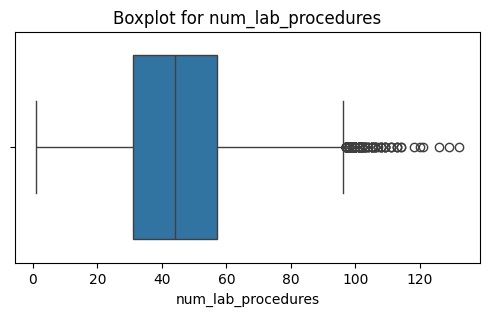

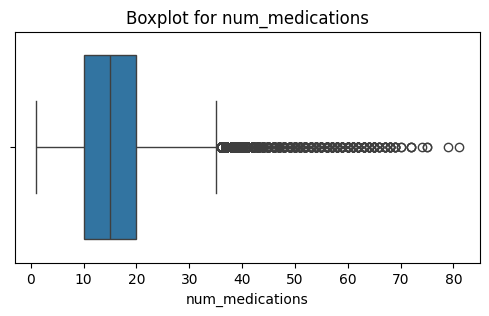

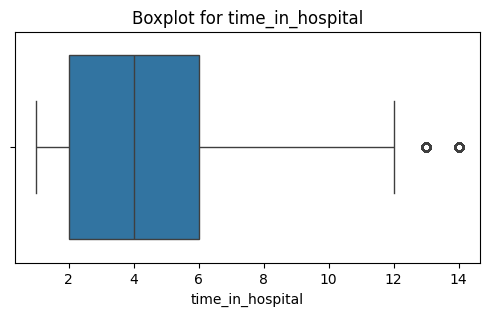

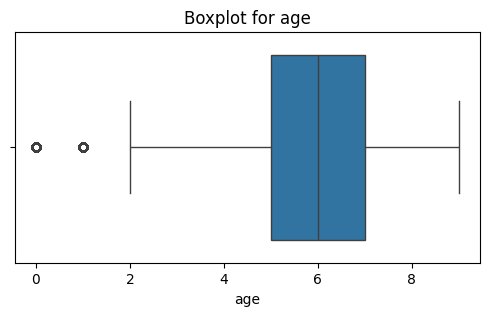

In [37]:
cols_to_check = ["num_lab_procedures", "num_medications", "time_in_hospital", 'age',]

for col in cols_to_check:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

Handling outliers

In [38]:
for col in cols_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

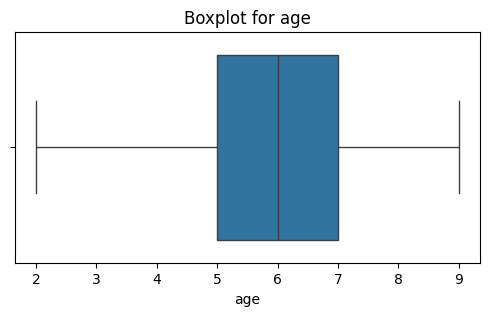

In [39]:
for col in ['age']:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

---

## Visualizations

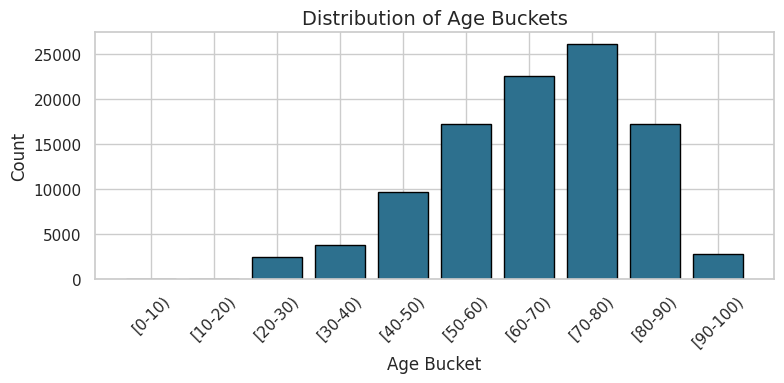

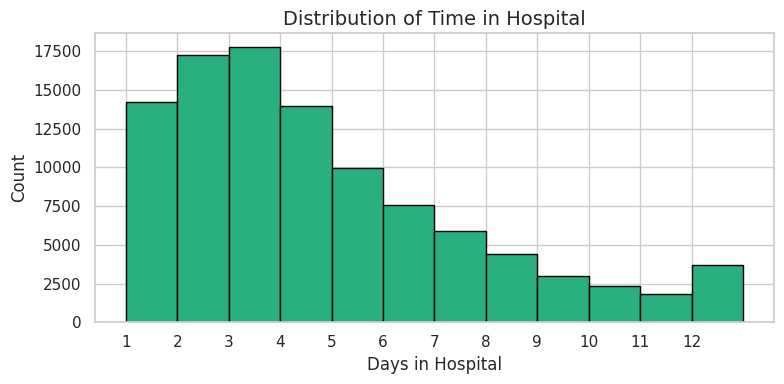

In [40]:
sns.set(style="whitegrid")

palette = sns.color_palette("viridis", 10)
bar_palette = sns.color_palette("Set2")


age_map = {
    0: '[0-10)', 1: '[10-20)', 2: '[20-30)', 3: '[30-40)', 4: '[40-50)',
    5: '[50-60)', 6: '[60-70)', 7: '[70-80)', 8: '[80-90)', 9: '[90-100)'
}


plt.figure(figsize=(8, 4))
plt.hist(df['age'], bins=np.arange(-0.5, 10.5, 1), edgecolor='black', color=palette[3], rwidth=0.8)
plt.title('Distribution of Age Buckets', fontsize=14)
plt.xlabel('Age Bucket')
plt.ylabel('Count')
plt.xticks(ticks=range(10), labels=[age_map[i] for i in range(10)], rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.xticks(ticks=range(df['time_in_hospital'].min(), df['time_in_hospital'].max()+1))
plt.hist(df['time_in_hospital'], bins=range(df['time_in_hospital'].min(), df['time_in_hospital'].max()+2), 
         edgecolor='black', color=palette[6])
plt.title('Distribution of Time in Hospital', fontsize=14)
plt.xlabel('Days in Hospital')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Visualizing readmission rates shows that the data is severly biased towards the 'No' value meaning we need to oversample to reduce the bias in the data.

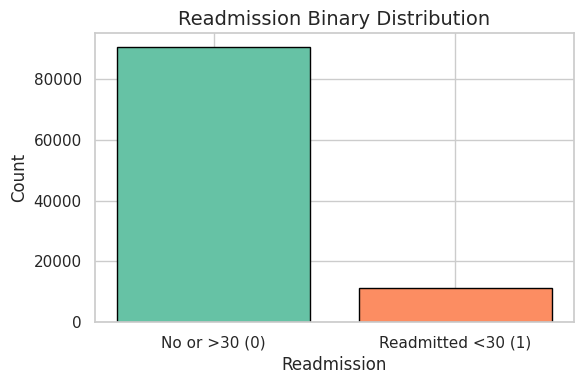

In [41]:
plt.figure(figsize=(6, 4))
readmit_counts = df['readmitted'].value_counts().sort_index()
labels = ['No or >30 (0)', 'Readmitted <30 (1)']
colors = [bar_palette[0], bar_palette[1]]
plt.bar(labels, readmit_counts, color=colors, edgecolor='black')
plt.title('Readmission Binary Distribution', fontsize=14)
plt.xlabel('Readmission')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

The cluster from 50 to 60 years old has a strangely low admission rate.

/tmp/ipykernel_23729/3018360718.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=age_readmit.index, y=age_readmit.values, marker='o', palette="mako")


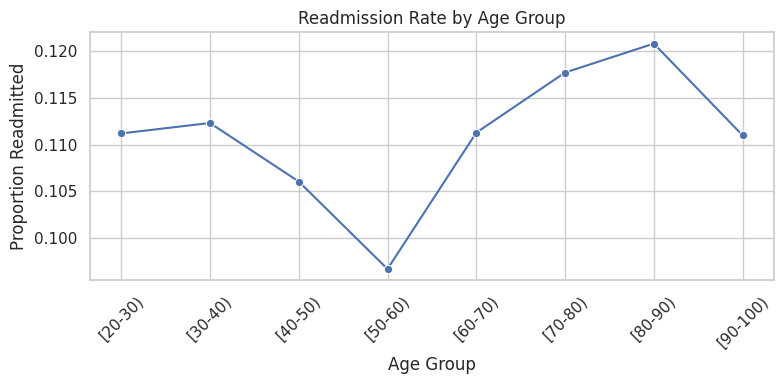

In [42]:
plt.figure(figsize=(8,4))
age_readmit = df.groupby('age')['readmitted'].mean().sort_index()
sns.lineplot(x=age_readmit.index, y=age_readmit.values, marker='o', palette="mako")
plt.title('Readmission Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion Readmitted')
plt.xticks(age_readmit.index, [age_map[i] for i in age_readmit.index], rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_23729/3341717538.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=readmit_rate.index.astype(str), y=readmit_rate.values, palette="magma")


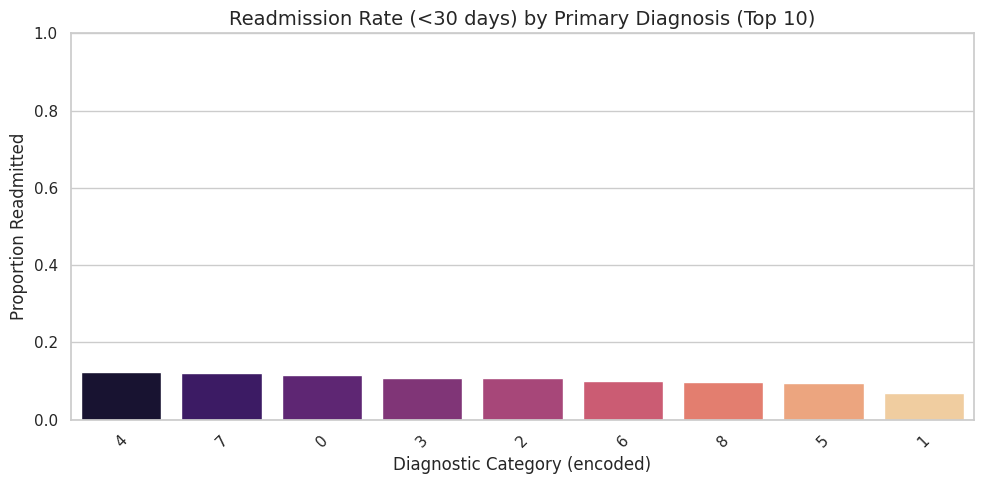

In [43]:
readmit_rate = (
    df.groupby('diag_1')['readmitted']
      .mean()
      .sort_values(ascending=False)
      .head(10)     
)

plt.figure(figsize=(10,5))
sns.barplot(x=readmit_rate.index.astype(str), y=readmit_rate.values, palette="magma")
plt.title('Readmission Rate (<30 days) by Primary Diagnosis (Top 10)', fontsize=14)
plt.xlabel('Diagnostic Category (encoded)')
plt.ylabel('Proportion Readmitted')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier

from sklearn.metrics import classification_report, roc_auc_score

In [ ]:
X = df.drop('readmitted', axis=1)
y = df['readmitted']

Applying SMOTE (Oversampling) because the value of the 1 (<30) is very under represented.

In [102]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("Before SMOTE:", y.value_counts().to_dict())
print("After SMOTE :", y_res.value_counts().to_dict())

Before SMOTE: {0: 90409, 1: 11357}
After SMOTE : {0: 90409, 1: 90409}


In [103]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, stratify=y_res, random_state=42)

In [104]:
from sklearn.metrics import confusion_matrix

def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred, digits=4))
    print(f"AUC: {roc_auc_score(y_test, y_prob):.4f}")

    cm = confusion_matrix(y_test, y_pred)
    print(cm)


    return name

In [ ]:
models = [
    (LogisticRegression(max_iter=1000), "Logistic Regression"),
    (SVC(probability=True), "SVM"),
    (RandomForestClassifier(n_estimators=100, random_state=42), "Random Forest"),
    (XGBClassifier(use_label_encoder=False, eval_metric='logloss'), "XGBoost")
]

In [106]:
for model, name in models:
    evaluate_model(model, name)

/home/ismailshadow/Programming/Python/Project/Projectvenv/lib64/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



=== Logistic Regression ===
              precision    recall  f1-score   support

           0     0.7413    0.7819    0.7611     18082
           1     0.7693    0.7272    0.7476     18082

    accuracy                         0.7545     36164
   macro avg     0.7553    0.7545    0.7544     36164
weighted avg     0.7553    0.7545    0.7544     36164

AUC: 0.8358
[[14138  3944]
 [ 4933 13149]]

=== Random Forest ===
              precision    recall  f1-score   support

           0     0.8799    0.9303    0.9044     18082
           1     0.9261    0.8731    0.8988     18082

    accuracy                         0.9017     36164
   macro avg     0.9030    0.9017    0.9016     36164
weighted avg     0.9030    0.9017    0.9016     36164

AUC: 0.9535
[[16822  1260]
 [ 2295 15787]]
